In [81]:
# import dependencies 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [82]:
#Read data and show data
wine = pd.read_csv('wineQualityWhitecut.csv', index_col = 0)
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [83]:
#Column info
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


## Preprocessing Data for performing Machine learning algorithms¶

In [84]:
#Classification - wine rated 7 or higher is good white wine
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [85]:
# bad = 0 and good = 1 
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'].astype(str))

In [86]:
# Categorizing 'good' and 'bad' counts
wine['quality'].value_counts()

0    1234
1     365
Name: quality, dtype: int64

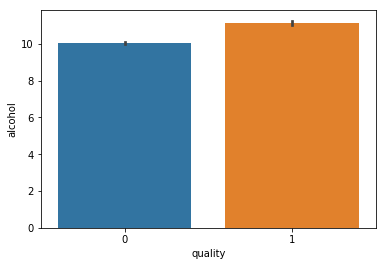

In [87]:
#quality vs alcohol
# bad quality = 0, good quality = 1
# More alcohol, better white wine
sns.barplot(x='quality', y='alcohol',data=wine)

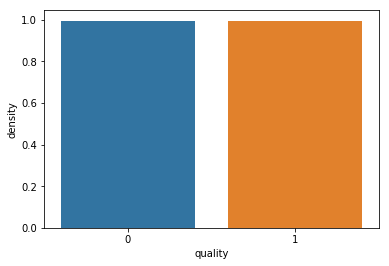

In [88]:
#quality vs density
# bad quality = 0, good quality = 1
# Even for density
sns.barplot(x='quality', y='density',data=wine)

In [89]:
#splitting data to X and y
X = wine.drop(['quality'], axis = 1)
y = wine['quality']

In [90]:
#Train Test Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [91]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [92]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       256
           1       0.71      0.62      0.67        64

   micro avg       0.88      0.88      0.88       320
   macro avg       0.81      0.78      0.79       320
weighted avg       0.87      0.88      0.87       320



In [95]:
#Check most important variables
rfc.feature_importances_

array([0.05905461, 0.06840012, 0.07019634, 0.074557  , 0.09483136,
       0.07915375, 0.08275642, 0.11495041, 0.09489505, 0.07846057,
       0.18274437])

### Most important variables are density and alcohol

In [96]:
feats = ['density','alcohol']

In [97]:
#Retrain using important variables
x_train, x_test, Y_train, Y_test = train_test_split(wine[feats], wine.quality, test_size = 0.2, random_state = 42)

In [98]:
rfc2 = RandomForestClassifier(n_estimators=200)
rfc2.fit(x_train, Y_train)
pred_rfc2 = rfc2.predict(x_test)

In [99]:
print(classification_report(Y_test, pred_rfc2))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       256
           1       0.44      0.55      0.49        64

   micro avg       0.77      0.77      0.77       320
   macro avg       0.66      0.69      0.67       320
weighted avg       0.79      0.77      0.78       320



### Random forest classifier has accuracy of 87% using all data, 79% using most important features

In [101]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[240  16]
 [ 24  40]]


# # Support Vector Classifier¶

In [106]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [107]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       256
           1       0.60      0.50      0.55        64

   micro avg       0.83      0.83      0.83       320
   macro avg       0.74      0.71      0.72       320
weighted avg       0.82      0.83      0.83       320



### Support vector classifier has accuracy of 82%

In [108]:
#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV
param = {
    'C': [1, 10, 100, 1000],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.0001, 0.0005, 0.001, 0.005]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10, verbose = 3)

In [ ]:
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7906976744186046, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] . C=1, gamma=0.0001, kernel=linear, score=0.828125, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ... C=1, gamma=0.0001, kernel=linear, score=0.8125, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] . C=1, gamma=0.0001, kernel=linear, score=0.796875, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] . C=1, gamma=0.0001, kernel=linear, score=0.796875, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8046875, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7265625, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] . C=1, gamma=0.0001, kernel=linear, score=0.828125, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8188976377952756, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8267716535433071, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.7596899224806202, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ..................

[CV] .... C=1, gamma=0.005, kernel=linear, score=0.8125, total=   0.0s
[CV] C=1, gamma=0.005, kernel=linear .................................
[CV] .. C=1, gamma=0.005, kernel=linear, score=0.796875, total=   0.0s
[CV] C=1, gamma=0.005, kernel=linear .................................
[CV] .. C=1, gamma=0.005, kernel=linear, score=0.796875, total=   0.0s
[CV] C=1, gamma=0.005, kernel=linear .................................
[CV] . C=1, gamma=0.005, kernel=linear, score=0.8046875, total=   0.0s
[CV] C=1, gamma=0.005, kernel=linear .................................
[CV] . C=1, gamma=0.005, kernel=linear, score=0.7265625, total=   0.0s
[CV] C=1, gamma=0.005, kernel=linear .................................
[CV] .. C=1, gamma=0.005, kernel=linear, score=0.828125, total=   0.0s
[CV] C=1, gamma=0.005, kernel=linear .................................
[CV]  C=1, gamma=0.005, kernel=linear, score=0.8188976377952756, total=   0.0s
[CV] C=1, gamma=0.005, kernel=linear ................................

[CV]  C=10, gamma=0.001, kernel=linear, score=0.7906976744186046, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .. C=10, gamma=0.001, kernel=linear, score=0.84375, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ... C=10, gamma=0.001, kernel=linear, score=0.8125, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] . C=10, gamma=0.001, kernel=linear, score=0.796875, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] . C=10, gamma=0.001, kernel=linear, score=0.796875, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ... C=10, gamma=0.001, kernel=linear, score=0.8125, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.7265625, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ..............................

[CV] .. C=100, gamma=0.0001, kernel=rbf, score=0.828125, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8110236220472441, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8031496062992126, total=   0.0s
[CV] C=100, gamma=0.0005, kernel=linear ..............................
[CV]  C=100, gamma=0.0005, kernel=linear, score=0.7906976744186046, total=   1.1s
[CV] C=100, gamma=0.0005, kernel=linear ..............................
[CV]  C=100, gamma=0.0005, kernel=linear, score=0.84375, total=   1.2s
[CV] C=100, gamma=0.0005, kernel=linear ..............................
[CV]  C=100, gamma=0.0005, kernel=linear, score=0.8203125, total=   1.2s
[CV] C=100, gamma=0.0005, kernel=linear ..............................
[CV]  C=100, gamma=0.0005, kernel=linear, score=0.8046875, total=   1.5s
[CV] C=100, gamma=0.0005, kernel=linear ......

[CV] .. C=100, gamma=0.005, kernel=rbf, score=0.8046875, total=   0.0s
[CV] C=100, gamma=0.005, kernel=rbf ..................................
[CV]  C=100, gamma=0.005, kernel=rbf, score=0.8267716535433071, total=   0.0s
[CV] C=100, gamma=0.005, kernel=rbf ..................................
[CV]  C=100, gamma=0.005, kernel=rbf, score=0.84251968503937, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV]  C=1000, gamma=0.0001, kernel=linear, score=0.7906976744186046, total=  11.4s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV]  C=1000, gamma=0.0001, kernel=linear, score=0.84375, total=  12.9s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV]  C=1000, gamma=0.0001, kernel=linear, score=0.8203125, total=  10.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV]  C=1000, gamma=0.0001, kernel=linear, score=0.796875, total=  13.5s
[CV] C=1000, gamma=0.0001, kernel=linear ......

In [23]:
#Best parameters for Grid SVC
print(grid_svc.best_params_)

# List the best score for grid SVC
print(grid_svc.best_score_)

{'C': 1000, 'gamma': 0.005, 'kernel': 'rbf'}
0.8295543393275997


In [24]:
#SVC with best parameters
svc2 = SVC(C = 100, gamma =  0.005, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       256
           1       0.57      0.45      0.50        64

   micro avg       0.82      0.82      0.82       320
   macro avg       0.72      0.68      0.70       320
weighted avg       0.81      0.82      0.81       320



# SVC improves from % to % using Grid Search CV

In [25]:
## Cross Validation Score

In [26]:
#Cross validation for different models
from sklearn.model_selection import cross_val_score
algs_list = [rfc, rfc2, svc, svc2]
algs_names = ['rfc','rfc(best)', 'svc', 'svc(best)']
i=0
for alg in algs_list:
    cross_score = cross_val_score(alg, X = X_train, y = y_train, cv = 10)
    print(f"{algs_names[i]} has a Cross Validation Score of {cross_score.mean()}")
    i +=1

rfc has a Cross Validation Score of 0.8764812896752732
rfc(best) has a Cross Validation Score of 0.8796183067051212


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

svc has a Cross Validation Score of 0.8217741904718305
svc(best) has a Cross Validation Score of 0.8248809264939266


## Random forest classifier has accuracy of 87% cross validation score using all data and 88% accuracy using best features. 